Variational AutoEncoder (VAE) with MNIST
========================================
---
Formation Introduction au Deep Learning  (FIDLE) - S. Arias, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020  

## Episode 2 - Analyse our trained model
 - Defining a VAE model
 - Build the model
 - Train it
 - Follow the learning process with Tensorboard


## Step 1 - Init python stuff

In [7]:
import numpy as np
import sys, importlib

import matplotlib.pyplot as plt

import modules.vae
import modules.data
importlib.reload(modules.data)
importlib.reload(modules.vae)
from modules.vae  import VariationalAutoencoder
from modules.data import load_MNIST

sys.path.append('..')
import fidle.pwk as ooo
importlib.reload(ooo)

ooo.init()

VariationalAutoencoder.about()


FIDLE 2020 - Practical Work Module
Version              : 0.2.5
Run time             : Wednesday 5 February 2020, 17:38:40
Matplotlib style     : ../fidle/talk.mplstyle
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf

FIDLE 2020 - Variational AutoEncoder (VAE)
TensorFlow version   : 2.0.0
VAE version          : 1.24


## Step 2 - Get data

In [2]:
(x_train, y_train), (x_test, y_test) = load_MNIST()

Dataset loaded.
Resized and normalized.
x_train shape : (60000, 28, 28, 1)
x_test_shape  : (10000, 28, 28, 1)


## Step 3 - Load best model

In [4]:
tag = '000'

vae=modules.vae.VariationalAutoencoder.load(tag, config='vae_config.json', weights='best_model.h5')
vae.encoder.summary()

Model initialized.
Outputs will be in  : ./run/000
Weights loaded from : ./run/000/models/best_model.h5
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 7, 7, 64)     36928       conv2d_5[0][0]        

## Step 4 - Reconstructing original images

In [5]:
z_points       = vae.encoder.predict(x_test)

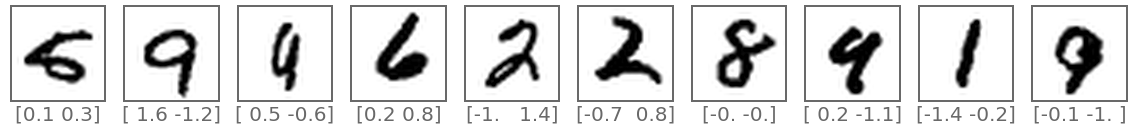

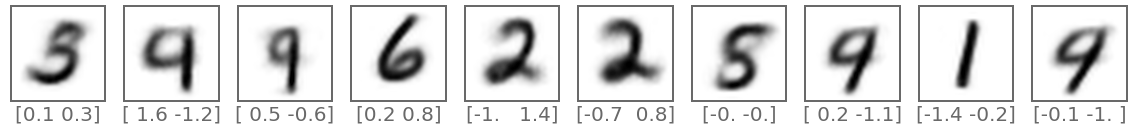

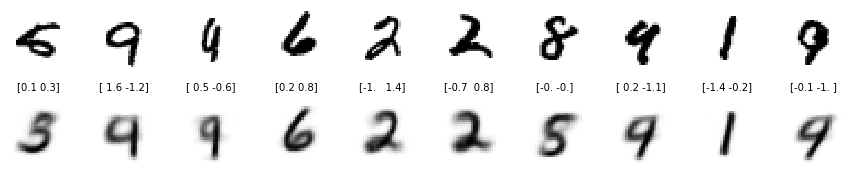

In [16]:
demo_nb = 10

i_demo = np.random.choice(range(len(x_test)), demo_nb)
x_demo = x_test[i_demo]

z_points       = vae.encoder.predict(x_demo)
reconst_images = vae.decoder.predict(z_points)

labels=[ str(np.round(z_points[i],1)) for i in range(demo_nb) ]
ooo.plot_images(x_demo, labels, range(demo_nb), columns=10, x_size=2,y_size=2)
ooo.plot_images(reconst_images , labels, range(demo_nb), columns=10, x_size=2,y_size=2)


fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(demo_nb):
    img = x_demo[i].squeeze()
    sub = fig.add_subplot(2, demo_nb, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)
            
    sub.imshow(img, cmap='gray_r')

for i in range(demo_nb):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, demo_nb, i+demo_nb+1)
    sub.axis('off')
    sub.imshow(img, cmap='gray_r')
plt.show()

## Step 5 - Train

In [21]:
import numpy as np

a=np.array([[1, 2], [5, 5]])
if a is not None : print('no')

no
